In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats

In [2]:
f_annotations = "../data/metadata/mapping/annotations_human_v2.txt"
f_bed_rsv = "../analysis/rsv_vsv_trans_peak_calling/results/bigWig/hcanonical+rsv_v2/G1_kethoxal-A549-RSV_M20-rght.bed"
f_bed_vsv = "../analysis/rsv_vsv_trans_peak_calling/results/bigWig/hcanonical+vsv_v2/G1_kethoxal-A549-VSV_M20-rght.bed"

In [3]:
dict_annotations = {}
with open(f_annotations, "r") as f:
    for line in f:
        row = line.strip("\r\n").split("\t")
        gname, annotation = row[0], row[1]
        dict_annotations[gname] = annotation

In [4]:
dict_short_code = {
    "3prime_overlapping_ncRNA": "lncRNA",
    "3prime_overlapping_ncrna": "lncRNA",
    "antisense": "lncRNA",
    "bidirectional_promoter_lncRNA": "lncRNA",
    "IG_C_gene": "Others",
    "IG_C_pseudogene": "Others",
    "IG_D_gene": "Others",
    "IG_D_pseudogene": "Others",
    "IG_J_gene": "Others",
    "IG_J_pseudogene": "Others",
    "IG_LV_gene": "Others",
    "IG_pseudogene": "Others",
    "IG_V_gene": "Others",
    "IG_V_pseudogene": "Others",
    "lincRNA": "lncRNA",
    "macro_lncRNA": "lncRNA",
    "miRNA": "ncRNA",  # nc
    "misc_RNA": "ncRNA",  # nc
    "Mt_rRNA": "rRNA",
    "Mt_tRNA": "rRNA",
    "polymorphic_pseudogene": "Others",
    "processed_pseudogene": "Others",
    "processed_transcript": "Others",
    "protein_coding": "mRNA",
    "pseudogene": "Others",
    "ribosomal_RNA": "rRNA",
    "ribozyme": "Others",
    "rRNA": "rRNA",
    "sense_intronic": "lncRNA",
    "sense_overlapping": "lncRNA",
    "scaRNA": "ncRNA",
    "snoRNA": "snoRNA",
    "snRNA": "snRNA",
    "scRNA": "ncRNA",
    "sRNA": "ncRNA",
    "TEC": "Others",
    "transcribed_processed_pseudogene": "Others",
    "transcribed_unitary_pseudogene": "Others",
    "transcribed_unprocessed_pseudogene": "Others",
    "TR_C_gene": "Others",
    "TR_D_gene": "Others",
    "TR_J_gene": "Others",
    "TR_J_pseudogene": "Others",
    "TR_V_gene": "Others",
    "TR_V_pseudogene": "Others",
    "unitary_pseudogene": "Others",
    "unprocessed_pseudogene": "Others"
}

### RSV

In [5]:
dict_tabulate = {}
with open(f_bed_rsv, "r") as f:
    for line in f:
        row = line.strip("\r\n").split("\t")
        nid = row[0].split("+")[1].split("-")[1]
        try:
            dict_tabulate[nid] += 1
        except KeyError:
            dict_tabulate[nid] = 1

In [6]:
dict_by_category_by_gname = {}
dict_by_category_by_counts = {}

for k, v in dict_tabulate.items():
    try:
        cat = dict_short_code[dict_annotations[k]]
    except KeyError:
        continue

    try:
        dict_by_category_by_counts[cat] += v
    except KeyError:
        dict_by_category_by_counts[cat] = v

    try:
        dict_by_category_by_gname[cat] += 1
    except KeyError:
        dict_by_category_by_gname[cat] = 1

In [7]:
dict_by_category_by_gname

{'mRNA': 111, 'ncRNA': 3, 'lncRNA': 9, 'snoRNA': 1, 'rRNA': 1}

(-1.1745964436405072, 1.03691380991646, -1.297513328653398, 1.1094053971161206)

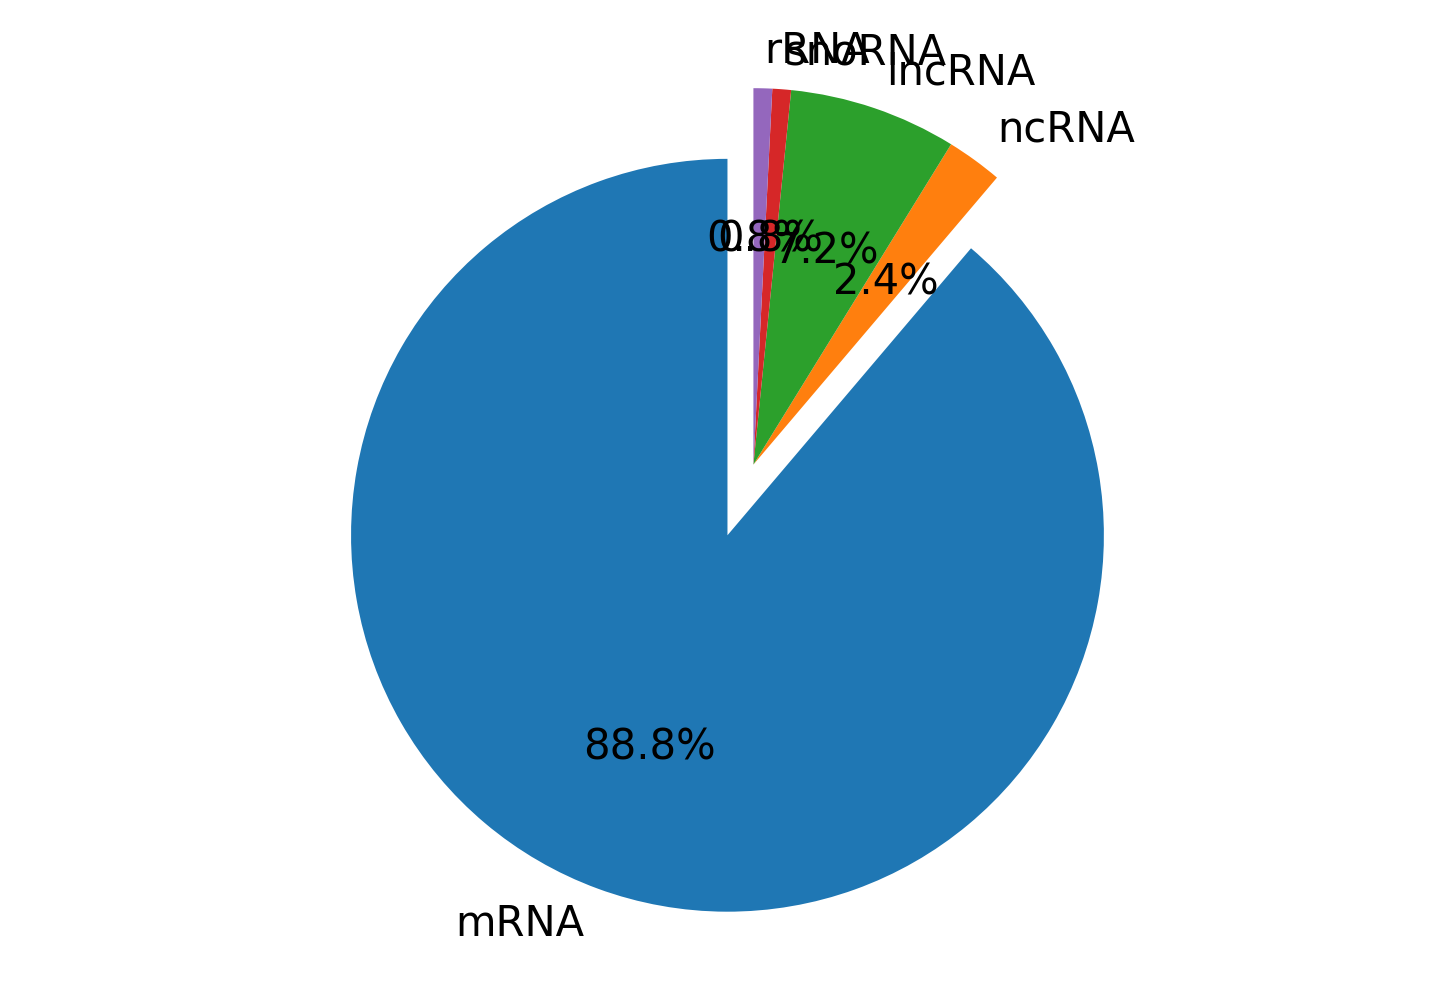

In [8]:
fig, ax = plt.subplots(dpi=300)
explode = (0.2, 0, 0, 0, 0)
ax.pie(dict_by_category_by_gname.values(), explode=explode, labels=dict_by_category_by_gname.keys(), autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

### VSV

In [12]:
dict_tabulate = {}
with open(f_bed_vsv, "r") as f:
    for line in f:
        row = line.strip("\r\n").split("\t")
        nid = row[0].split("+")[1].split("-")[1]
        try:
            dict_tabulate[nid] += 1
        except KeyError:
            dict_tabulate[nid] = 1

In [13]:
dict_by_category_by_gname = {}
dict_by_category_by_counts = {}

for k, v in dict_tabulate.items():
    try:
        cat = dict_short_code[dict_annotations[k]]
    except KeyError:
        continue

    try:
        dict_by_category_by_counts[cat] += v
    except KeyError:
        dict_by_category_by_counts[cat] = v

    try:
        dict_by_category_by_gname[cat] += 1
    except KeyError:
        dict_by_category_by_gname[cat] = 1

In [14]:
dict_by_category_by_gname

{'mRNA': 664,
 'snoRNA': 40,
 'ncRNA': 5,
 'lncRNA': 17,
 'Others': 12,
 'snRNA': 1,
 'rRNA': 1}

(-1.1699834635901187,
 1.0440261076876822,
 -1.302374042791216,
 1.1096368594364376)

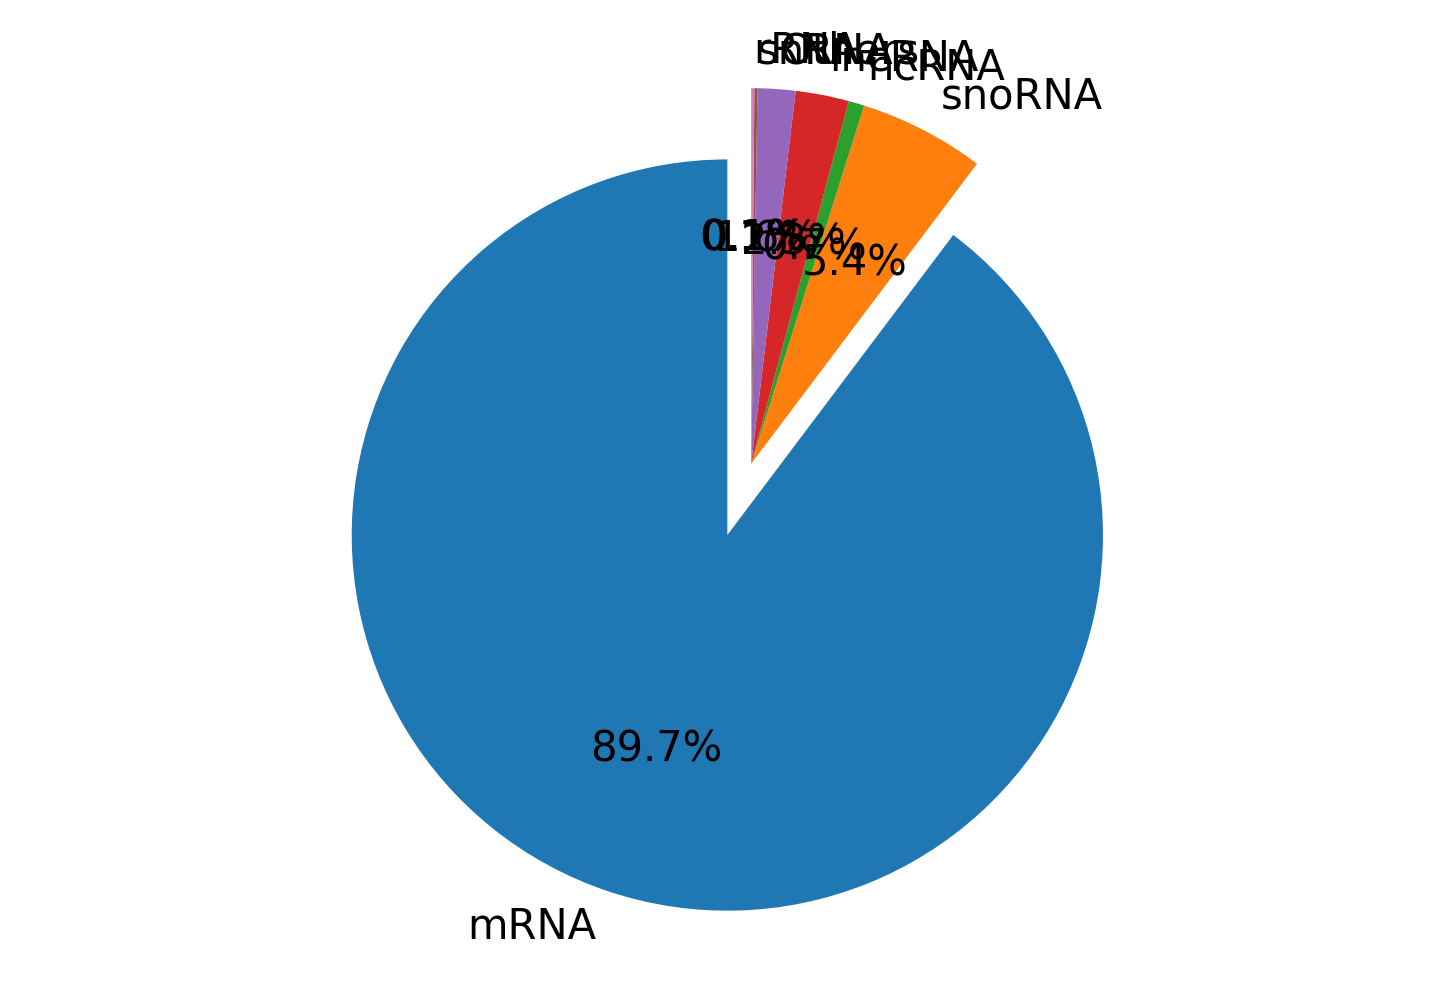

In [15]:
fig, ax = plt.subplots(dpi=300)
explode = (0.2, 0, 0, 0, 0, 0, 0)
ax.pie(dict_by_category_by_gname.values(), explode=explode, labels=dict_by_category_by_gname.keys(), autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.